In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("mysql_actual_vs_rl_vs_fixed_storage_JN.csv")
df = df.set_index("timeslot")
df.head()

,rl_storage_allocator,actual_disk_usage,greedy_storage_allocator
timeslot,,,
0,199.724,199.724,199.724
1,199.732,199.732,204.724
2,199.744,199.744,204.724
3,199.748,199.748,204.724
4,199.756,199.756,204.724


In [3]:
df.dropna()
#df['timeslot'] = df['timeslot'].astype("Int64")
df['rl_storage_allocator'] = df['rl_storage_allocator'].astype("float64")
df['actual_disk_usage'] = df['actual_disk_usage'].astype("float64")
df['greedy_storage_allocator'] = df['greedy_storage_allocator'].astype("float64")

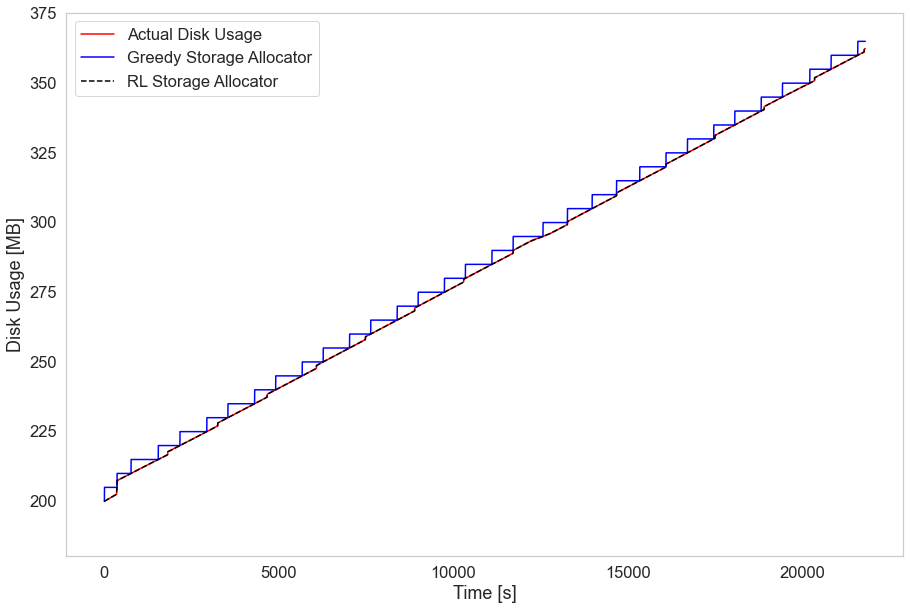

In [37]:
fig2 = plt.figure(figsize=(15, 10))
ax = fig2.add_subplot(1, 1, 1)
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.lineplot(data=df_rabbit_compressed_ip_op_equal["Disk_Usage"], color = "blue", linestyle ="--", ax = ax)
#sns.lineplot(data=df["actual_storage_space"], color = "green", linestyle ="--", ax = ax)
#sns.lineplot(data=df["rl_storage_allocator"], color = "blue", linestyle ="-", ax = ax)
sns.lineplot(data=df["actual_disk_usage"], color = "red", ax = ax)
sns.lineplot(data=df["greedy_storage_allocator"], color = "blue", ax = ax)
sns.lineplot(data=df["rl_storage_allocator"], color = "black", linestyle = "--", ax = ax)

plt.ylim((180,375))
ax.set(xlabel='Time [s]', ylabel='Disk Usage [MB]')
plt.legend(["Actual Disk Usage", "Greedy Storage Allocator", "RL Storage Allocator"], loc = "upper left")
# plt.title("RabbitMQ Disk Usage - Compressed vs Uncompressed", pad =  20)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\mysql\mysql_storage_allocation.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\mysql\mysql_storage_allocation.pdf", dpi = 300)
plt.show()

In [18]:
df_downtime = pd.read_csv("mysql_fixed_vs_rl_downtime_unusedSpace.csv")
df_downtime = df_downtime.set_index("timeslot")
df_downtime.head()

,current_allocated_disk_space,unused_allocated_disk_space,downtime_fixed_storage_allocation,predicted_disk_space,unused_disk_space_MB,unused_disk_space_rl,downtime_rl_storage_allocator
timeslot,,,,,,,
0,199724,0,1,199724,0.000,0.0,1.0
1,204724,4992,1,199732,4.992,0.0,2.0
2,204724,4980,1,199744,4.980,0.0,3.0
3,204724,4976,1,199748,4.976,0.0,4.0
4,204724,4968,1,199756,4.968,0.0,5.0


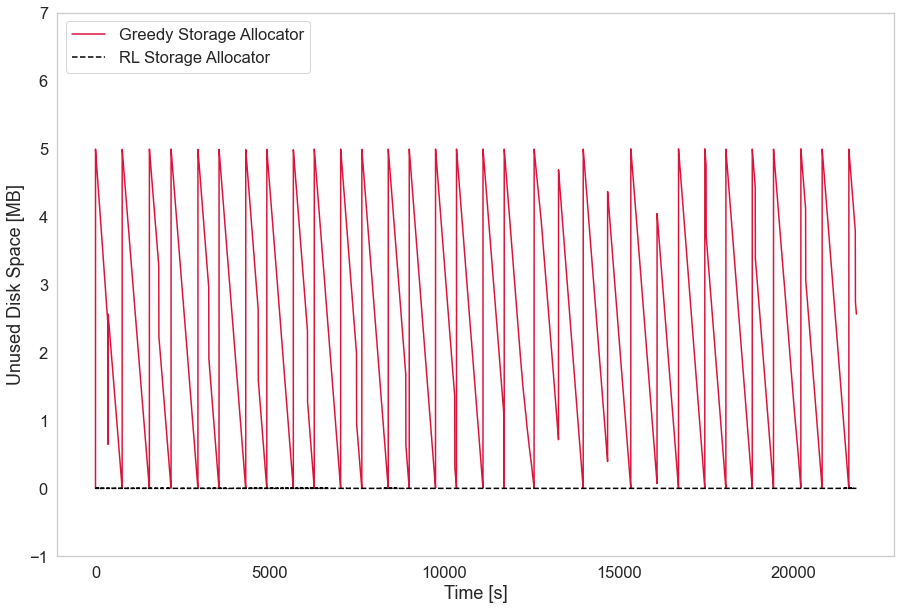

In [30]:
fig3 = plt.figure(figsize=(15, 10))
ax = fig3.add_subplot(1, 1, 1)
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.lineplot(data=df_rabbit_compressed_ip_op_equal["Disk_Usage"], color = "blue", linestyle ="--", ax = ax)
#sns.lineplot(data=df["actual_storage_space"], color = "green", linestyle ="--", ax = ax)
#sns.lineplot(data=df["rl_storage_allocator"], color = "blue", linestyle ="-", ax = ax)
# sns.lineplot(data=df_downtime["rewards_per_episode"], color = "red", ax = ax)
ax.set(xlabel='Time [s]', ylabel='Unused Disk Space [MB]')
sns.lineplot(data=df_downtime["unused_disk_space_MB"], color = "crimson", linestyle = "-", ax = ax)
sns.lineplot(data=df_downtime["unused_disk_space_rl"], color = "black", linestyle = "--", ax = ax)
plt.legend(["Greedy Storage Allocator", "RL Storage Allocator"], loc = "upper left")
plt.ylim((-1,7))
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\mysql\mysql_unused_storage.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\mysql\mysql_unused_storage.pdf", dpi = 300)
plt.show()

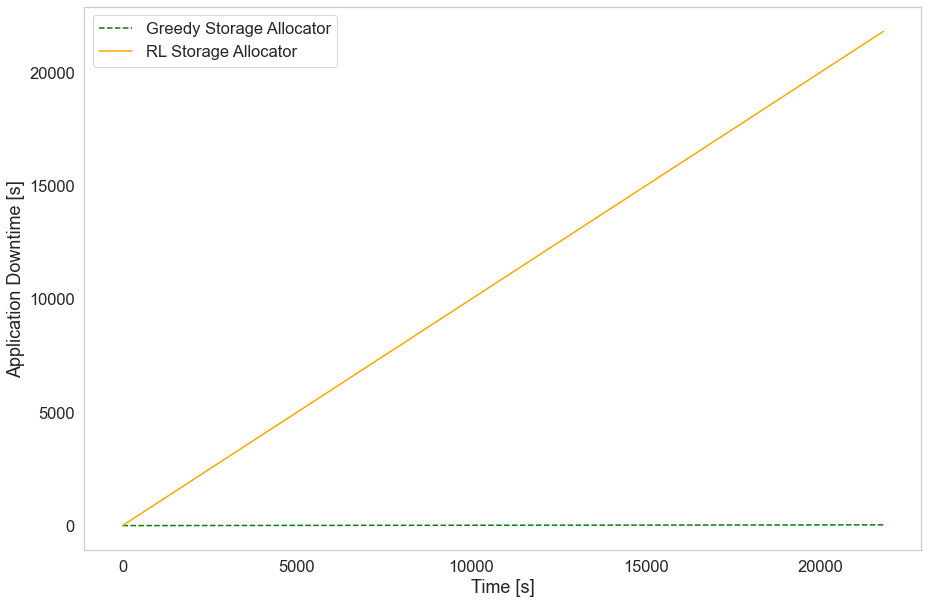

In [32]:
fig4 = plt.figure(figsize=(15, 10))
ax = fig4.add_subplot(1, 1, 1)
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.lineplot(data=df_rabbit_compressed_ip_op_equal["Disk_Usage"], color = "blue", linestyle ="--", ax = ax)
#sns.lineplot(data=df["actual_storage_space"], color = "green", linestyle ="--", ax = ax)
#sns.lineplot(data=df["rl_storage_allocator"], color = "blue", linestyle ="-", ax = ax)
ax.set(xlabel='Time [s]', ylabel='Application Downtime [s]')
sns.lineplot(data=df_downtime["downtime_fixed_storage_allocation"], color = "green", linestyle = "--", ax = ax)
sns.lineplot(data=df_downtime["downtime_rl_storage_allocator"], color = "orange", ax = ax)
plt.legend(["Greedy Storage Allocator", "RL Storage Allocator"], loc = "upper left")
# plt.ylim((10000,300000))
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\mysql\mysql_downtime.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\mysql\mysql_downtime.pdf", dpi = 300)
plt.show()

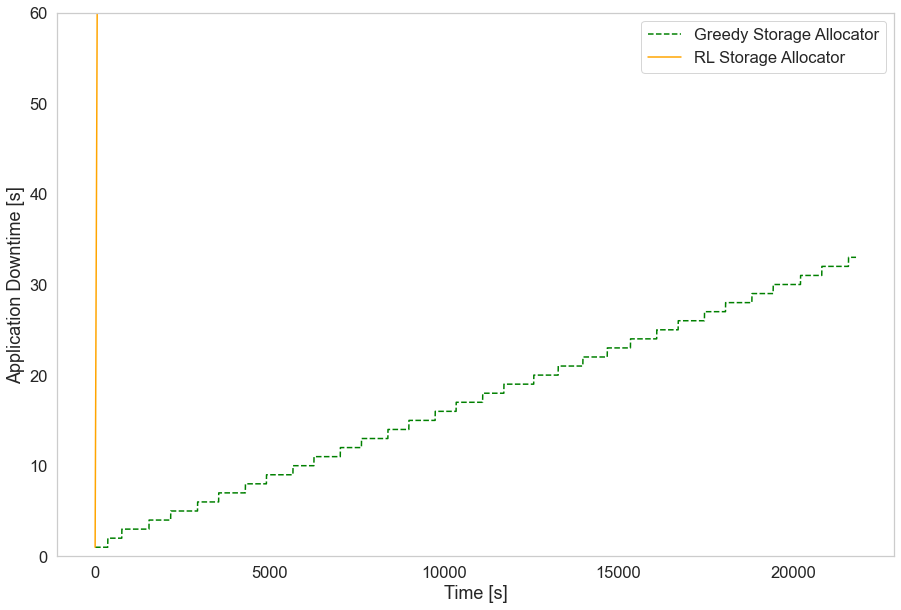

In [34]:
fig4 = plt.figure(figsize=(15, 10))
ax = fig4.add_subplot(1, 1, 1)
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.lineplot(data=df_rabbit_compressed_ip_op_equal["Disk_Usage"], color = "blue", linestyle ="--", ax = ax)
#sns.lineplot(data=df["actual_storage_space"], color = "green", linestyle ="--", ax = ax)
#sns.lineplot(data=df["rl_storage_allocator"], color = "blue", linestyle ="-", ax = ax)
ax.set(xlabel='Time [s]', ylabel='Application Downtime [s]')
sns.lineplot(data=df_downtime["downtime_fixed_storage_allocation"], color = "green", linestyle = "--", ax = ax)
sns.lineplot(data=df_downtime["downtime_rl_storage_allocator"], color = "orange", ax = ax)
plt.legend(["Greedy Storage Allocator", "RL Storage Allocator"], loc = "upper right")
plt.ylim((0,60))
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\mysql\mysql_downtime_emph.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\mysql\mysql_downtime_emph.pdf", dpi = 300)
plt.show()